In [24]:
# Project1
# Author: Uyen Nguyen

# Part 1: Data scraping and preparation

# Step 1: Scrape your competitor's data

import requests
import pandas as pd
from bs4 import BeautifulSoup

# Get data from the url cmsc320's mirror of the SWL's top 50 solar flares

r = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html')
root = BeautifulSoup(r.content, 'html')

# Use find() to save the table as a variable

tab = root.find('table')
my_tab = pd.read_html(tab.prettify())[0]

# Set reasonable names for the table columns

my_tab.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
my_tab.index = range(50)

my_tab



,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


In Step 1, the data from the table is scraped from the website 'https://cmsc320.github.io/files/top-50-solar-flares.html'. The scraping was done by search for 'table' in the html metada with the help of the BeautifulSoup module. In addition, the method pd.read_html in the Pandas module was used to read in the table and convert the data therein directly into the DataFrame format.  

In [25]:
# Step 2: Tidy the top 50 solar flare data
# Drop the last column of the table

# Use datetime import to combine the date and each of the three time columns into three datetime columns

new_tab = my_tab.drop('movie',1)

# Combine date columns. Update the values in the dataframe

str_time = pd.to_datetime(new_tab['date'] + ' ' + new_tab['start_time'])
max_time = pd.to_datetime(new_tab['date'] + ' ' + new_tab['maximum_time'])
endin_time = pd.to_datetime(new_tab['date'] + ' ' + new_tab['end_time'])
    
new_tab['start_time'] = str_time
new_tab['maximum_time'] = max_time
new_tab['end_time'] = endin_time
                        
# Set regions coded as "-" as 'NAN'

new_tab = new_tab.replace('-', 'NaN')

SWL_dataframe = new_tab.copy()

SWL_dataframe

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003/10/28,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005/09/07,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,2003/10/29,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,1997/11/06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2017/09/06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,2006/12/05,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,2003/11/02,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


The main task in Step 2 was to convert the three time columns (start_time, maximum_time, end_time) from the string to the datatime objects so that this latter format could be used for plotting, grouping, etc. later on in Part 2 and Part 3. The conversion to the datatime object was achieved by using Pandas's to_datatime method. We note that the datatime object does not accept 24:00:00 for H:M:S. In other words, 24:00:00 hour must be converted to 00:00:00 hour to avoid syntax errors.

In [26]:
# Step 3: Scrape the NASA data

import requests

r2 = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')

# Use BeautifulSoup functions to obtain a long string.

root2 = BeautifulSoup(r2.content, 'html')
tab_info = root2.find('pre').get_text()

# Extract line by line into array arr

arr = tab_info.split('\n')

# Delete some lines of the dataset since we will not use them

del arr[0:12]
del arr[522:]

# To store the line splitted into columns

final_lst = []

for rows in arr:
    co = rows.split(' ')
    co[:] = [e for e in co if e]
    co_arr = []
    for c in co:
        co_arr.append(c)
    final_lst.append(co_arr)

# Create a DataFrame at this point so it’s easier to use melt or wide_to_long for the next few steps.

my_tab2 = pd.DataFrame(final_lst)

# Delete columns from column PHTX afterward

my_tab2 = my_tab2.drop(list(my_tab2)[14:25], axis = 1)

# Choose appropriate names for columns.

my_tab2.columns = ['start_date', 'start_time', 'end_date', 'end_time','start_frequency', 'end_frequency', \
                   'flare_location','flare_region', 'flare_classification', 'cme_date', 'cme_time', \
                   'cme_angle', 'cme_width', 'cme_speed']

my_tab2.head(100)

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2000/11/12,14:25,11/12,14:40,3000,2000,S14E05,9227,C4.4,11/12,14:50,257,50,581
96,2000/11/23,08:16,11/23,08:35,14000,9000,S26W40,9238,C5.4,11/23,06:06,Halo,360,492
97,2000/11/23,21:00,11/23,21:06,3500,3000,S20E60,9239,C7.9,11/23,21:30,124,148,1198
98,2000/11/24,05:10,11/24,15:00,14000,100,N20W05,9236,X2.0,11/24,05:30,Halo,360,1289


In Step 3, we scraped the data, which was in the text format, from this NASA's website: https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html. Again, we used BeautifulSoup to begin the scraping process. Unlike in Step 2 where the table metadata was present in the html code, we now had to extract the data as text by reading the text line by line and to reshape the data into the DataFrame format. Several columns were deleted by using the 'drop' method in Pandas (with "axis=1" for columns). Finally, the columns were assigned names.

In [27]:
# Step 4 Tidy the NASA the table
import re
import datetime

# Replace any missing entries as 'NaN'.

my_tab2
my_tab2 = my_tab2.replace('----', 'NaN')
my_tab2 = my_tab2.replace('-----', 'NaN')
my_tab2 = my_tab2.replace('------', 'NaN')
my_tab2 = my_tab2.replace('BACK', 'NaN')
my_tab2 = my_tab2.replace('back', 'NaN')
my_tab2 = my_tab2.replace('--:--', 'NaN')
my_tab2 = my_tab2.replace('--/--', 'NaN')
my_tab2 = my_tab2.replace('????', 'NaN')

# Create a new column, named is_halo, indicates if a row corresponds to a halo flare or not

is_halo = []
for i in range(522):
    if my_tab2['cme_angle'][i] == 'Halo':
        is_halo.append('True')
    else:
        is_halo.append('False')
my_tab2['is_halo'] = is_halo
        
# Replace Halo entries in the cme_angle column as 'NAN'.

my_tab2 = my_tab2.replace('Halo', 'NaN')

my_tab2.head(50)

# Create a new column that indicates if width is given as a lower bound

is_lower_bound = []
for i in range(522):
    if re.search(r'>', my_tab2['cme_width'][i]) == None:
        is_lower_bound.append('False')
    else:
        is_lower_bound.append('True')
my_tab2['width_lower_bound'] = is_lower_bound

# Remove any non-numeric part of the width column. 

my_tab2['cme_width'] = my_tab2['cme_width'].str.replace('>','')


# Combine date and time columns for start, end and cme so they can be encoded as datetime objects.
# Note: "24:00" must be converted to "00:00". Otherwise, using the to_datetime function to convert the time's 
# string format to the datatime object will return errors.

my_tab2['start_time'] = ["00:00" if (a == "24:00") else a for a in my_tab2['start_time']]
start_date_time = [my_tab2['start_date'][i]+' '+my_tab2['start_time'][i] \
                  for i in range(0,len(my_tab2['start_time']))]

my_tab2['end_time'] = ["00:00" if (a == "24:00") else a for a in my_tab2['end_time']]
end_date_time = [(my_tab2['start_date'][i])[0:4]+'/'+my_tab2['end_date'][i]+' '+my_tab2['end_time'][i] \
                  for i in range(0,len(my_tab2['end_time']))]

my_tab2['cme_time'] = ["00:00" if (a == "24:00") else a for a in my_tab2['cme_time']]
cme_date_time = [(my_tab2['start_date'][i])[0:4]+'/'+my_tab2['cme_date'][i]+' '+my_tab2['cme_time'][i] \
                  for i in range(0,len(my_tab2['cme_time']))]
    

my_tab3 = my_tab2.copy()

my_tab3.insert(0,'start_datetime',start_date_time)
my_tab3.insert(1,'end_datetime',end_date_time)
my_tab3.insert(11,'cme_datetime',cme_date_time)

#Since the original cme_time column contains several NaN/missing entries, it is essential to use the option
#errors = 'coerce' in the arguments of the to_datetime function when the cme_time's string format is converted
#to the datatime object. Otherwise, there would be syntax errors.

my_tab3['start_datetime'] = my_tab3['start_datetime'].apply(lambda n: pd.to_datetime(n))
my_tab3['end_datetime'] = my_tab3['end_datetime'].apply(lambda n: pd.to_datetime(n))
my_tab3['cme_datetime'] = my_tab3['cme_datetime'].apply(lambda n: pd.to_datetime(n,errors='coerce'))

NASA_dataframe = my_tab3.drop(['start_date','start_time','end_date','end_time','cme_date','cme_time'],axis=1)

NASA_dataframe.head(50)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


Step 4 is primarily devoted to data cleaning. For instance, the missing entries denoted by "----" are replaced with "NaN", a standard format that can be recognized by Pandas. New columns were created to denote meaningful events. For example, the original entry ">301" in row 21 and column cme_width is not decomposed into two entries: "301" in the cme_width column and True in the with_lower_bound column. The three time columns (start_datetime, end_datetime, cme_datetime) were converted from the string to datatime object. This tidy dataframe and the tidy Top 50 Flare dataframe will be used in Part 2 and 3 for data analysis. I learned that 24:00:00 hour must be converted to 00:00:00 hour before the method to_datetime can be used. Since the original cme_time column contained several NaN/missing entries, it was essential to use the option "errors = 'coerce'" in the arguments of the to_datetime method during the converstion to the datatime object. Otherwise, there would be syntax errors.

In [28]:
# Project1
# Author: Uyen Nguyen

# Part 2: Data Analysis

#Question 1: Replication

#To see how well the NASA data can replicate SpaceWeatherLive's top 50 solar flares, we select from the
#NASA dataframe only the rows that contain the X-class solar flares. It is known that the X-class has the
#highest X-ray intensity compared with the M, C, and B classes.

my_tab4 = NASA_dataframe.copy()
flare_col_label = my_tab4['flare_classification']
flare_col_label = ['X' if (a[0] == 'X') else ' ' for a in my_tab4['flare_classification']]
my_tab4.insert(7,'flare_type',flare_col_label)
my_tab4_X = my_tab4[my_tab4['flare_type'] == 'X']
my_tab4_X = my_tab4_X.drop('flare_type',axis=1)

#Creating an extra column, called 'flare_magnitude', denoting the magnitude of the solar flare activity.
#This column is used for sorting the dataframe. The column is obtained by removing 'X' and converting
#its subsequent string into floating-point numbers for sorting.

my_tab4_X['flare_magnitude'] = my_tab4_X['flare_classification'].apply(lambda x: x[1:])
my_tab4_X['flare_magnitude'] = my_tab4_X['flare_magnitude'].apply(lambda x: pd.to_numeric(x))

#Sorting the NASA table is based on the solar flare classification, i.e., the flare_classification column.  
#Ranking is performed only within the X-class.

NASA_dataframe_sorted = my_tab4_X.sort_values('flare_magnitude', axis=0, ascending=False)

#Top 50 solar flares from the NASA table. This top 50 solar flares from NASA's data will be compared with those
#coming from the SapceWeatherLive data.

NASA_dataframe_sorted.head(50)




,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,flare_magnitude
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,28.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,20.0
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False,17.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,14.0
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False,10.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,9.4
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False,9.3
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,9.0
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False,8.3
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False,8.3


The last column of the output shows the magnitude of the X-class flares in the NASA dataset that were sorted in descending order. Only the solar flares in this class were considered because their X-ray brightness exceed that of those in classes B, C, and M (Reference: http://solar-center.stanford.edu/SID/activities/flare.html). The code selected the rows of the dataframe with the flare_type values of X, converted the flare_magnitude values from string to numeric, and sorted the rows based on these converted values.

Comparing with the SpaceWeatherLive data, the replication of the top 50 solar flares using the NASA data is accurate enough although the former dataset has more activities than the top solar flares sorted from the latter dataset. For example, the top seven flares in the SpaceWeatherLive data match the top six flares in the NASA data. The fourth top flare with the flare_magnitude value of X17+ in the SpaceWeatherLive data does not appear in the top 50 sorted NASA data. A close examination of the NASA data using the start_time information shows that this particular solar flare appears in the NASA dataset with the value of X1.7 instead of X17+! Therefore, the sorting algorithm did not pick up this value among the top 50 flares. This simple discrepancy shows that errors were present due to possibly incorrect data entry or faulty sensor reading.


In [29]:
# Question 2: Integration

# From the SWL and NASA dataframes, we will build two sub-dataframes, called SWL_table and NASA_table,
# which are used solely to compare the rows of the two original dataframes. 
# This is done by retaining three columns in the original dataframes for comparisons: 
# region (solar flare region), start date (without time), and the magnitude of the X-ray.
# In addition, format conversions are required to compare strings and decimals for matching the rows
# in the two sub-dataframes. 

SWL_table = SWL_dataframe.copy()
SWL_table['flare_magnitude'] = SWL_table['x_classification'].apply(lambda x: x[1:])
SWL_table['flare_magnitude'] = SWL_table['flare_magnitude'].apply(lambda x: x.replace('+',''))
SWL_table['flare_magnitude'] = SWL_table['flare_magnitude'].apply(lambda x: pd.to_numeric(x))
SWL_table['region'] = SWL_table['region'].apply(lambda x: pd.to_numeric(x))

SWL_table['start_time'] = SWL_table['start_time'].dt.strftime('%Y-%m-%d')
SWL_table.rename(columns = {'start_time':'start_date'}, inplace = True)
SWL_table.rename(columns = {'flare_magnitude':'X_magnitude'}, inplace = True)
SWL_table.drop(['x_classification','date','maximum_time','end_time'], axis=1, inplace = True)

# Reformatting NASA data so that they can be compared with SWL data. We only retain three columns for comparisons:
# region (solar flare region), start date (without time), and the magnitude of the X-ray.

NASA_table = NASA_dataframe_sorted[['flare_classification','flare_region','start_datetime','flare_magnitude']]
NASA_table['start_datetime'] = NASA_table['start_datetime'].dt.strftime('%Y-%m-%d')
NASA_table.rename(columns = {'start_datetime':'start_date'}, inplace = True)
NASA_table.rename(columns = {'flare_magnitude':'X_magnitude'}, inplace = True)
NASA_table.rename(columns = {'flare_region':'region'}, inplace = True)
NASA_table.drop(['flare_classification'], axis=1, inplace = True)

# Since the region is used for comparison between a row in NASA_table and its corresponding rows 
# in the SWL table, all regions labelled as "NaN" in the NASA_table are removed first.

index_names = NASA_table[NASA_table['region'] == 'NaN' ].index
NASA_table.drop(index_names, inplace = True)

#The region entries in NASA_table are reformatted (modulo 10000) so that they agree with those in SWL_table

NASA_table['region'] = NASA_table['region'].apply(lambda x: pd.to_numeric(x))
NASA_table['region'] = [(x-10000) if x > 10000 else x for x in NASA_table['region']]

# We declare that a row of NASA_table matches a row of SWL_table if all three following conditions hold: 
# (1) the start_dates are the same; 
# (2) the regions are the same; 
# (3) the difference between the X-magnitude is less than or equal to 0.4.

rank_SWL = ["no match" for i in range(len(NASA_dataframe_sorted))]
NASA_dataframe_sorted.insert(0,'rank_SWL',rank_SWL)

for r in NASA_table.itertuples():
    for R in SWL_table.itertuples():
        if (r.region == R.region) and \
            (r.start_date == R.start_date) and \
            (abs(r.X_magnitude - R.X_magnitude) <= 0.4):
                NASA_dataframe_sorted.loc[r.Index,'rank_SWL'] = R.rank

NASA_dataframe_sorted.head(50)


<ipython-input-29-d75fc1b889c4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASA_table['start_datetime'] = NASA_table['start_datetime'].dt.strftime('%Y-%m-%d')
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

,rank_SWL,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,flare_magnitude
240,1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,28.0
117,2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,20.0
233,3,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False,17.0
126,no match,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,14.0
234,6,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False,10.0
8,7,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,9.4
514,8,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False,9.3
328,9,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,9.0
237,10,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False,8.3
515,no match,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False,8.3


In Question 1, the main step is to insert the column labelled rank_SWL into the sorted solar flares in the NASA data to indicate possible matches with those in the SpaceWeatherLive data. The criteria for deciding the "best" match are discussed in the second paragraph below. The code created two auxiliary dataframes, one for each dataset, which contain only four columns for comparisons: start_date, flare_region, and flare_magnitude (or importance). Since the solar flare region is a criterion for matching, the entries in this column must be converted to strings for string comparison. Also, the missing entries in this column in the NASA data, which are labelled as 'NaN', were removed because exact string matching was implemented in the first two criteria. Furthermore, several regions in the SpaceWeatherLive data were truncated from five digits to four digits by taking modulo 10,000. This was accounted for in the code. After the format conversions were complete, the best matches were determined by iterative comparisons between rows of the SpaceWeatherLive and NASA data. Here, we iterated over the two dataframes using the method itertuples.

The "best" match is determined as follows. A row of the NASA table (NASA_table) matches a row of the SpaceWeatherLive table (SWL_table) if all three following conditions hold: 

1. The start_dates are the same; 
2. The regions are the same; 
3. The difference between the two X-magnitude values, in absolute values, is less than or equal to 0.4.

The first two matching criteria are based on exact string matching. The third matching criterion is a quantitative and approximate comparison between the X-ray brightness. For example, the 5th-ranked solar flare in the SpaceWeatherLive data has the flare magnitude of X14.4 on 2005-09-07. This event seemingly corresponds to the event on the row with index 126 in the NASA dataset that has the flare magnitude of X14. So, exact string matches are not sufficient due to the inaccuracy of the sensor readings. 

Based on these criteria, the rank_SWL column was created and inserted as the first column into the sorted solar flares from the NASA table. If there is not a match, the entry was labelled as "no match" in this column.

<ipython-input-30-e285b76398e8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  width_sorted['cme_width'] = width_sorted['cme_width'].apply(pd.to_numeric, errors='coerce')


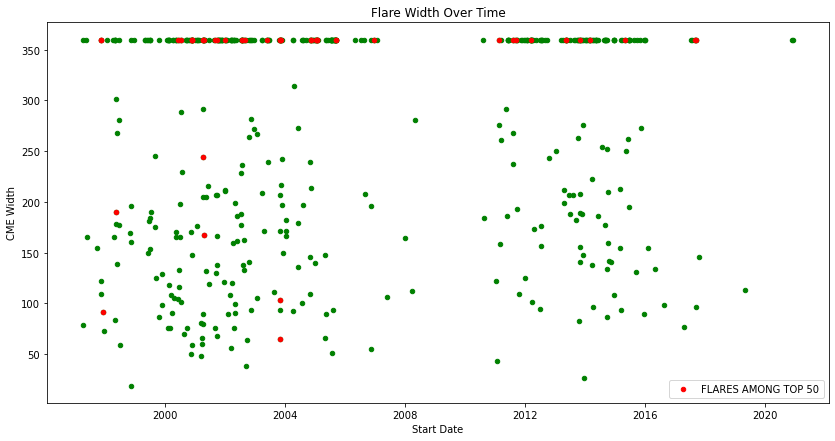

In [30]:
# Question 3: Analysis

# This block of code creates a scatter plot of CME widths versus time for the entire NASA dataset as well as 
# the top 50 solar flare datasets. The points in the entire NASA dataset are in green. Those in the top 50
# solar flare datsets are in red.

import matplotlib.pyplot as plt

width_all = NASA_dataframe[['start_datetime', 'cme_width']]

# Convert CME widths in the entire (sorted) NASA dataset from strings to numerics

width_sorted = NASA_dataframe_sorted[['start_datetime', 'cme_width']]
width_sorted['cme_width'] = width_sorted['cme_width'].apply(pd.to_numeric, errors='coerce')

index_sorted = NASA_dataframe_sorted[['start_datetime', 'cme_width']].index
index_sorted_top50 = index_sorted[0:50]

# Convert CME widths in the top 50 solar flare dataset from strings to numerics

width_top50 = width_sorted.loc[index_sorted_top50]
width_top50['cme_width'] = width_top50['cme_width'].apply(pd.to_numeric, errors='coerce')

# Merge the two above dataframes into one dataframe for plotting by using the outer join operation.
# This procedure was done with the help of the outerjoin operation of dataframes in Pandas. 

outerjoin = pd.merge(width_all, width_top50, on='start_datetime', how='outer')
outerjoin['cme_width_x'] = outerjoin['cme_width_x'].apply(pd.to_numeric, errors='coerce')
outerjoin['cme_width_y'] = outerjoin['cme_width_y'].apply(pd.to_numeric, errors='coerce')

# Plot the two datasets in one plot. This requires the previous step of merging two dataframes into 
# one dataframe. Then, the method pd.plot was invoked to generate the plot. Additional argument parameters
# were used to specific the kind of plot (scatter), label the plot (axes), and resize the figure.

ax = outerjoin.plot(x='start_datetime', y='cme_width_x', kind='scatter',\
               color='green', figsize=(10,10))

outerjoin.plot(x='start_datetime', y='cme_width_y', kind='scatter',\
               label = "FLARES AMONG TOP 50", color='red', figsize=(14,7), ax=ax)  

ax.set_title("Flare Width Over Time")
ax.set_xlabel("Start Date")
ax.set_ylabel("CME Width")

plt.show()


The above scatter plot shows the spread of CME flare widths in the NASA dataset over time. The horizontal axis is the start date. The vertical axis is the CME flare widths. The points are labeled in green. In addition, the top 50 flares in this dataset were plotted as the red points. Three conclusions can be inferred from this plot. 

1. The flare widths were skewed towards the Halo CMEs (value = 360), in both the overall NASA dataset and top 50 solar flares. In fact, the data points are clustered overtime around the the Halo CMEs over time, except for a break between 2008 and approximately 2011 due to the limited availability of data for solar flare acitivities. 

2. If the Halo CMEs are ignored, the variation of the CME widths is spread more evenly over time. Indeed, if we discard the data points corresponding to the Halo CMEs, the distribution of the remaining points look more random.

3. Most data points in the top 50 solar flare dataset are clustered around the Halo CME value. 

The plot was constructed using dataframe's plot method. To plot the overall NASA dataset and the top 50 flares data on the same plot, I first created the outer join of these two dataframes in order to consolidate the two datasets into one dataframe before calling pd.plot. Furthermore, I had to convert the cme_width values from strings to numerics before plotting. Pandas's plotting of dataframe allows for 'NaN' entries. I took advantage of this feature in Pandas by adding the argument "errors='coerce'" in the conversion step.
 

<AxesSubplot:title={'center':'HaloCMEs'}, xlabel='Data Sets'>

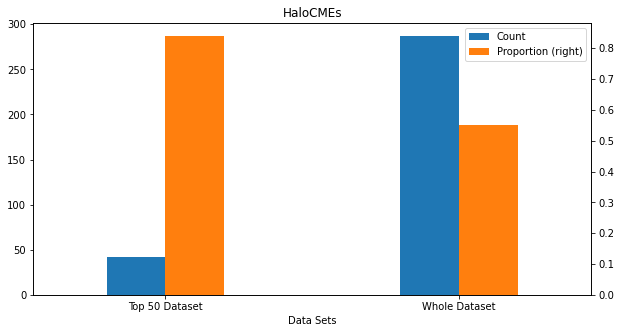

In [31]:
# Tally the number of Halo CMEs and compute its percentage for the top 50 solar flare dataset

HaloCount_top50 = outerjoin['cme_width_y'].value_counts()[360]
percent_Halo_top50 = HaloCount_top50/50

# Tally the number of Halo CMEs and compute its percentage for the entire NASA dataset

HaloCount_all = outerjoin['cme_width_x'].value_counts()[360]
percent_Halo_all = HaloCount_all/len(outerjoin)

# Structure the tallies and percentages found above into the dataframe format for plotting

index = ['Top 50 Dataset', 'Whole Dataset']
Halo_count = [HaloCount_top50, HaloCount_all]
Halo_proportion = [percent_Halo_top50, percent_Halo_all]

df = pd.DataFrame({'Count':Halo_count,\
                   'Proportion': Halo_proportion}, index=index)

# Plot the dataframe using two y-axis: the left y-axis represents the total number of Halo CMEs; 
# the right y-axis represents the percentage/proportion of Halo CMEs.

df.plot(kind='bar', secondary_y='Proportion', rot= 0, figsize=(10,5),\
        xlabel='Data Sets', title='HaloCMEs', width=0.4)



The above bar plot compares the tally of Halo CMEs and their distribution in the entire NASA dataset with the corresponding count and distribution in the top 50 solar flare dataset. The tally/count of Halo CMEs is in blue; the percentage/proportion in orange. The left y-axis indicates the total numbers of Halo CMEs. From the plot, there are approximately 280 Halo CMEs in the overall NASA dataset. Among these 280 Halo CMEs, almost 50 of them appear in the top 50 solar flare dataset.

The right y-axis indicates the percentage of Halo CMEs in each of the two datasets. From the plot, the percentage of Halo CMEs is about 90% for the top 50 solar flare dataset. The corresponding percentage of Halo CMEs in the overall NASA dataset is only about 55%. This result shows that the outcomes of the sorting and ranking of the top 50 solar flares is consistent with the interpretation of Halo CMEs and their clustering over time. 

<AxesSubplot:title={'center':'Number of Flares'}, xlabel='Month', ylabel='Number of Flares per month'>

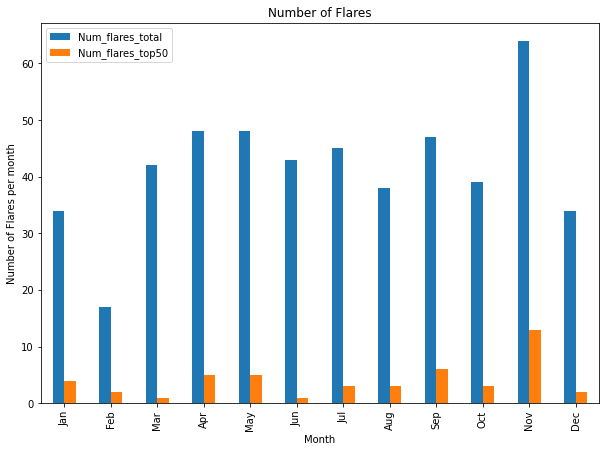

In [32]:
# Group the entries in the outerjoin dataframe by months and count the number of solar flares. 
# The result is a dataframe with the index size of 12 (for months). 

df = outerjoin

df1 = df.groupby(df['start_datetime'].dt.month).count()

# Rename the index for the new dataframe consisting of the total number of flares per months over time.

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Form a dataframe with relevant information for studying the cluster of strong flares in each month.

df2 = pd.DataFrame({'Num_flares_total':df1['cme_width_x'].values,\
                    'Num_flares_top50':df1['cme_width_y'].values},\
                     index = months)

# Generate a bar plot showing the number of flares per month for the entire NASA dataset. The results 
# are shown in blue bars. In addition, the number of flares per month in the top 50 solar flare datasets
# is also shown side by side with the blue bars.

df2.plot(kind='bar', xlabel='Month', ylabel='Number of Flares per month', title = 'Number of Flares', figsize=(10,7)) 



In the bar plot above, the total number of flares per month in the entire NASA dataset are depicted in blue. The total number of flares per month in the top 50 solar flare dataset are depicted in orange. From this plot, the month of November has the most active solar flare activity as well as the highest number of strong flares (in the top 50). In other words, strongest flares tend to cluster in November.